**Financial Ratios Analysis for Early Detection of Audit Risk**

In the context of financial audits, detecting early signs of company distress is critical for effective risk assessment and resource allocation. This project aims to support auditors by analyzing key financial ratios to uncover patterns and anomalies that differentiate healthy companies from those at risk of bankruptcy.

By examining profitability, liquidity, solvency, and efficiency ratios, this study identifies consistent trends that signal financial health or potential failure. The goal is to provide auditors with data-driven insights that enhance their ability to detect red flags in financial statements, focus attention on high-risk clients, and ultimately improve the quality and efficiency of the audit process.


# Step #1: Import libraries and selecting data

In [129]:
import warnings
warnings.filterwarnings('ignore')

In [130]:
import pandas as pd

In [131]:
import numpy as np # numerical python

In [132]:
import matplotlib.pyplot as plt

In [133]:
import seaborn as sns

In [134]:
# Loading the Bankruptcy data from the Taiwan Economic Journal for the years 1999–2009
#from: Kaggle (https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction)
df = pd.read_csv("/Users/rociozahoryvasquezromero/Documents/DSML2025/Labs/Week 3/Project1.week3/data.csv")

# Step #2: Explore dataset

In [135]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [136]:
df.shape

(6819, 96)

In [137]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

# Step #3: Understanding and Cleaning data

In [138]:
#Deleting extra space in the column names
df.columns = df.columns.str.strip()

In [139]:
#Checking for missing values
df.isnull().sum()
#Result:This dataframe has not missing values

Bankrupt?                                                  0
ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
                                                          ..
Liability to Equity                                        0
Degree of Financial Leverage (DFL)                         0
Interest Coverage Ratio (Interest expense to EBIT)         0
Net Income Flag                                            0
Equity to Liability                                        0
Length: 96, dtype: int64

In [140]:
#Cheking for blank rows in the dataframe
df.eq(" ").sum()
#Result:This dataframe has not blank rows

Bankrupt?                                                  0
ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
                                                          ..
Liability to Equity                                        0
Degree of Financial Leverage (DFL)                         0
Interest Coverage Ratio (Interest expense to EBIT)         0
Net Income Flag                                            0
Equity to Liability                                        0
Length: 96, dtype: int64

In [141]:
#Checking for duplicates in rows
df.duplicated().sum()
#Result:This dataframe has not duplicates in rows

np.int64(0)

In [142]:
#In order to make the analysis easier, I will rename the column in the df DataFrame, because this column is a float not a percentage
df.rename(columns={'Debt ratio %' : "Debt Ratio"}, inplace=True)

In [143]:
df.columns

Index(['Bankrupt?', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax

In [144]:
#Reviewing dispersion in "Current Ratio"
print(df['Current Ratio'].describe())
#Outlier detected in the "Current Ratio", is the maxumin value of the column

count    6.819000e+03
mean     4.032850e+05
std      3.330216e+07
min      0.000000e+00
25%      7.555047e-03
50%      1.058717e-02
75%      1.626953e-02
max      2.750000e+09
Name: Current Ratio, dtype: float64


In [145]:
#Outlier detected in the "Current Ratio" is the maximum value of the column
df[['Current Ratio']].sort_values(by='Current Ratio', ascending=False).head(10)

,Current Ratio
2499,2.750000e+09
2490,1.000000e+00
2393,7.126299e-01
2345,5.861149e-01
2296,5.798079e-01
2200,5.208034e-01
539,2.825894e-01
2247,2.688553e-01
3180,2.668079e-01
488,1.888169e-01


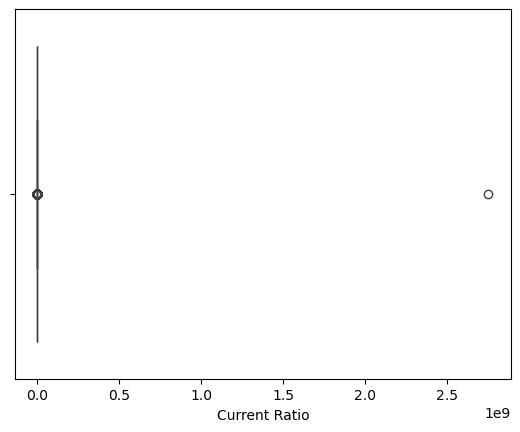

In [146]:
#Boxplot displayed to show the outlier detected in the "Current Ratio" column
sns.boxplot(x='Current Ratio', data=df);

In [147]:
#Remuving the outlier in the "Current Ratio" column
#Removing it helps reveal the true underlying data distribution.
idx_max = df['Current Ratio'].idxmax()

# Drop that row
df = df.drop(idx_max)

# Reset index if needed
df.reset_index(drop=True, inplace=True)


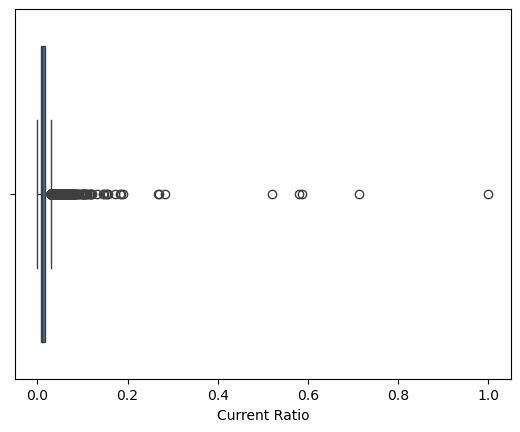

In [148]:
#Boxplot displayed to show to show the tendency witouth the outlier deleted
sns.boxplot(x='Current Ratio', data=df);

In [149]:
print(df['Current Ratio'].describe())

count    6818.000000
mean        0.015107
std         0.023606
min         0.000000
25%         0.007554
50%         0.010587
75%         0.016268
max         1.000000
Name: Current Ratio, dtype: float64


In [150]:
#In order to make the analysis easier, we will rename the column in the df_ratios DataFrame
df.rename(columns={'ROA(A) before interest and % after tax': 'ROA'}, inplace=True)

In [151]:
#This project will focus on the key ratios used to distinguish a healthy company from bankrupt one 
# Selected key financial ratios to differentiate healthy vs bankrupt companies,
# based on initial data exploration and domain knowledge
#Creating a new DataFrame with only the key ratios 
selected_columns = [
    'Bankrupt?',
    'ROA',
    'Current Ratio',
    'Debt Ratio',
    'Total Asset Turnover'
]

df_ratios = df[selected_columns]


In [152]:
df_ratios.columns

Index(['Bankrupt?', 'ROA', 'Current Ratio', 'Debt Ratio',
       'Total Asset Turnover'],
      dtype='object')

In [153]:
df_ratios.head()

,Bankrupt?,ROA,Current Ratio,Debt Ratio,Total Asset Turnover
0,1,0.424389,0.002259,0.207576,0.086957
1,1,0.538214,0.006016,0.171176,0.064468
2,1,0.499019,0.011543,0.207516,0.014993
3,1,0.451265,0.004194,0.151465,0.089955
4,1,0.538432,0.006022,0.106509,0.175412


In [154]:
df_ratios.shape

(6818, 5)

In [155]:
#Verifying the data types of the columns 
df_ratios.dtypes

Bankrupt?                 int64
ROA                     float64
Current Ratio           float64
Debt Ratio              float64
Total Asset Turnover    float64
dtype: object

In [156]:
#Counting how many companies are brankrupt in the dataset 
(df_ratios['Bankrupt?'] == 1).sum()
#This column is the category variable that I will analyze in the model


np.int64(220)

In [157]:
df_ratios.describe(include="all")

,Bankrupt?,ROA,Current Ratio,Debt Ratio,Total Asset Turnover
count,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,0.032268,0.558614,0.015107,0.113187,0.141624
std,0.176723,0.065618,0.023606,0.053917,0.101140
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.535543,0.007554,0.072891,0.076462
50%,0.000000,0.559802,0.010587,0.111452,0.118441
75%,0.000000,0.589130,0.016268,0.148835,0.176912
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [158]:
#Save cleaned dataset as a new CSV file:
df.to_csv("cleaned_data.csv", index=False)

# Step #3.1: Distribution of Profitability Ratio

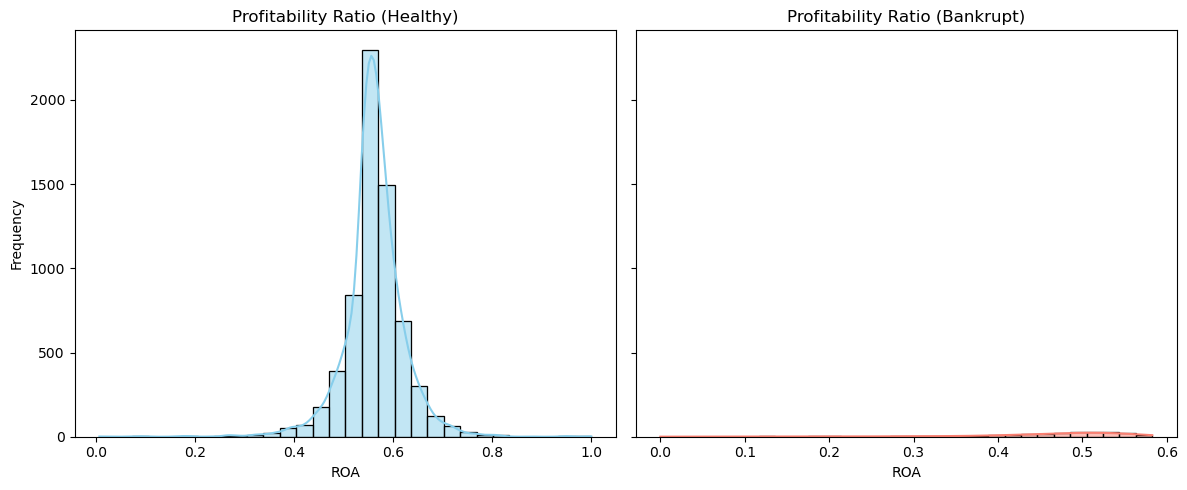

In [159]:
# Filter healthy and bankrupt companies
healthy = df[df['Bankrupt?'] == 0]
bankrupt = df[df['Bankrupt?'] == 1]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.histplot(healthy['ROA'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Profitability Ratio (Healthy)')
axes[0].set_xlabel('ROA')
axes[0].set_ylabel('Frequency')

sns.histplot(bankrupt['ROA'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Profitability Ratio (Bankrupt)')
axes[1].set_xlabel('ROA')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


This histogram shows how profitable the companies are for both healthy and bankrupt companies.

✅ The healthy companies curve is shifted to the right, it means they tend to have higher ROA 
— i.e., they use their assets more efficiently to generate profit.

❌The bankrupt companies curve is is mostly on the left or negative, it means low or negative profitability was more common among them.

🧠 Interpretation: Higher ROA is generally linked to financial health

# Step #3.2: Distribution of Liquidity Ratio

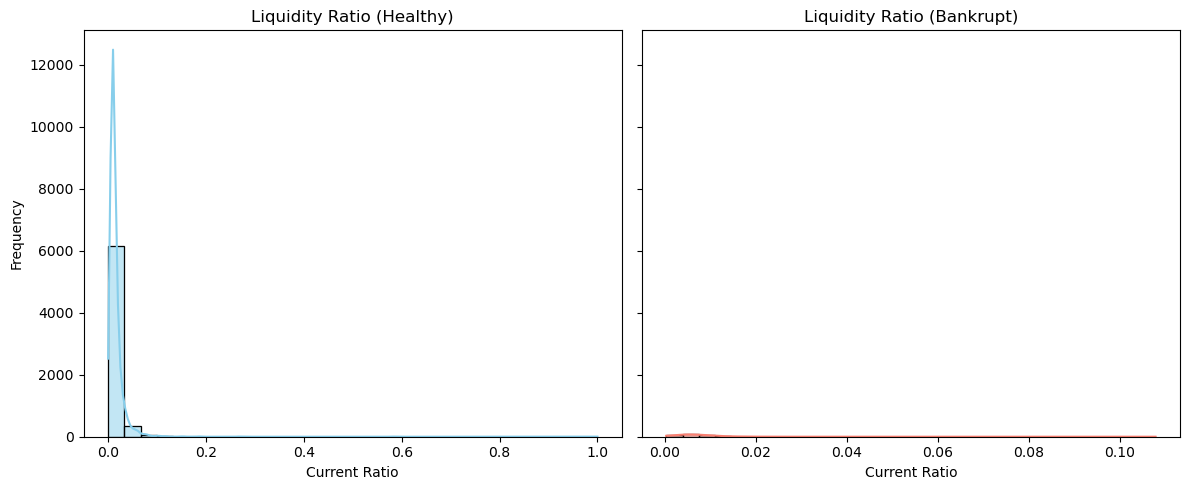

In [160]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.histplot(healthy['Current Ratio'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Liquidity Ratio (Healthy)')
axes[0].set_xlabel('Current Ratio')
axes[0].set_ylabel('Frequency')

sns.histplot(bankrupt['Current Ratio'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Liquidity Ratio (Bankrupt)')
axes[1].set_xlabel('Current Ratio')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

This histogram shows how well companies can pay short-term debts for both healthy and bankrupt companies.

✅ The healthy companies curve is shifted to the left, it means the curve is extremely concentrated near 0, with values not exceeding 1 and with a very high frequency of values close to 0. This indicates that most healthy companies in the dataset have a very low Current Ratio.


❌The bankrupt companies curve is mostly on the left, it means the curve is even more concentrated near zero but with smaller minimum values and less dispersion. This indicates that bankrupt companies have an extremely low Liquidity Ratio, close to zero or almost zero.

🧠 Interpretation: 
The healthy companies have a much higher frequency of values slightly greater than zero, while bankrupt companies are even closer to zero and less frequent. This suggests that having an extremely low Liquidity Ratio (almost zero) is more closely related to bankruptcy.


# Step #3.3: Distribution of Solvency Ratio

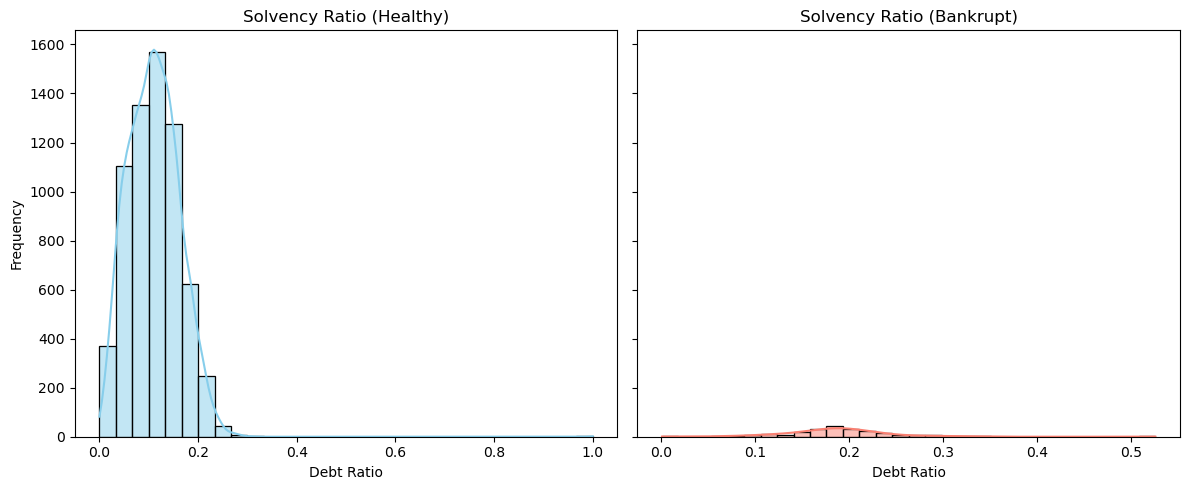

In [161]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.histplot(healthy['Debt Ratio'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Solvency Ratio (Healthy)')
axes[0].set_xlabel('Debt Ratio')
axes[0].set_ylabel('Frequency')

sns.histplot(bankrupt['Debt Ratio'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Solvency Ratio (Bankrupt)')
axes[1].set_xlabel('Debt Ratio')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


This histogram shows how much of a company’s assets are financed by debt for both healthy and bankrupt companies.

✅ The healthy companies curve is mostly on the left side (low debt-to-equity), showing they use less debt and are safer financially.


❌The bankrupt companies curve is shifted to the right side (high debt), meaning high debt load and more financial risk.

🧠 Interpretation: 
Left curve means low debt and safer companies; right curve means high debt and risk of bankruptcy.

# Step #3.4: Distribution of Efficiency Ratio 

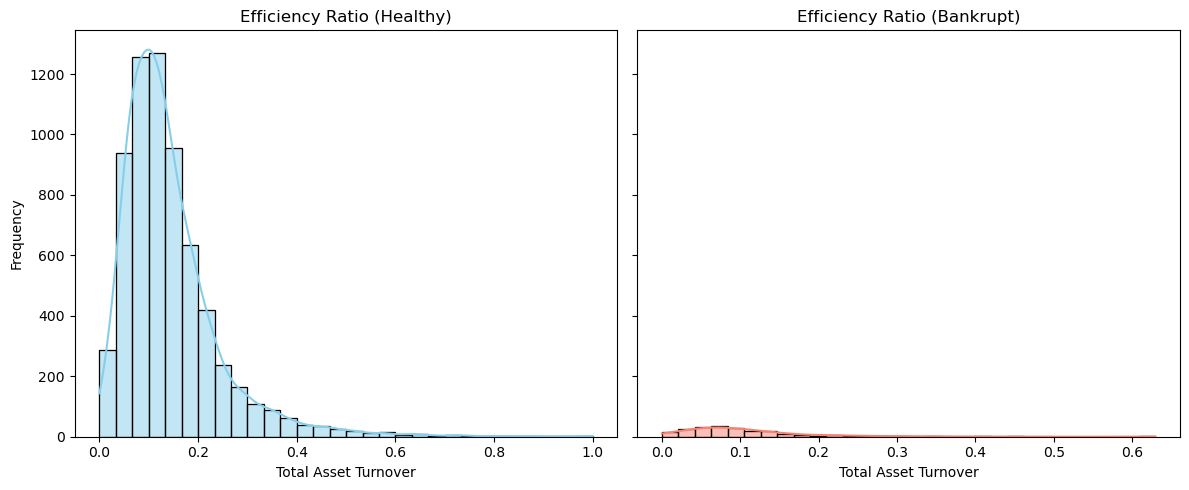

In [162]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.histplot(healthy['Total Asset Turnover'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Efficiency Ratio (Healthy)')
axes[0].set_xlabel('Total Asset Turnover')
axes[0].set_ylabel('Frequency') 

sns.histplot(bankrupt['Total Asset Turnover'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Efficiency Ratio (Bankrupt)')
axes[1].set_xlabel('Total Asset Turnover')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


This histogram shows how well the company use its resources for both healthy and bankrupt companies.

✅ The healthy companies curve tends to be more on the right, showing efficient use of assets to generate sales.


❌The bankrupt companies curve is more on the left, meaning less efficient asset use.

🧠 Interpretation: 
Right curve means good operational efficiency; left curve means poor efficiency, linked to problems.

# Step #4: Exploratory Data Analysis (EDA):

In [163]:
#Definition of categorical variable 
cat = df_ratios['Bankrupt?']

In [164]:
#Bankruptcy: 
# 0 = healthy, 
# 1 = bankrupt
cat.unique()

array([1, 0])

In [165]:
#Counting how many companies are brankrupt in the dataset
cat_frequency_table= cat.value_counts()
cat_frequency_table

Bankrupt?
0    6598
1     220
Name: count, dtype: int64

In [166]:
cat_proportion_table = cat.value_counts(normalize=True).round(2)
cat_proportion_table

Bankrupt?
0    0.97
1    0.03
Name: proportion, dtype: float64

In [167]:
#Merging absoluty frequency with relative frequencies (proportions)
cat_2 = pd.concat([cat_frequency_table, cat_proportion_table], axis=1)
cat_2.columns = ['absolute_frequency', 'relative_frequency']
cat_2 

,absolute_frequency,relative_frequency
Bankrupt?,,
0,6598,0.97
1,220,0.03


In [168]:
#Check total of companies with the original dataframe (total in original dataframe = 6819)
cat_2["absolute_frequency"].sum()

np.int64(6818)

In [169]:
total_absolute = int(cat_frequency_table.sum())
total_relative = int(cat_proportion_table.sum())

In [170]:
cat_total_row = pd.DataFrame({
    'absolute_frequency': [total_absolute],
    'relative_frequency': [total_relative]
}, index=['Total'])
cat_total_row

,absolute_frequency,relative_frequency
Total,6818,1


# Step #4.1: Categorical variable

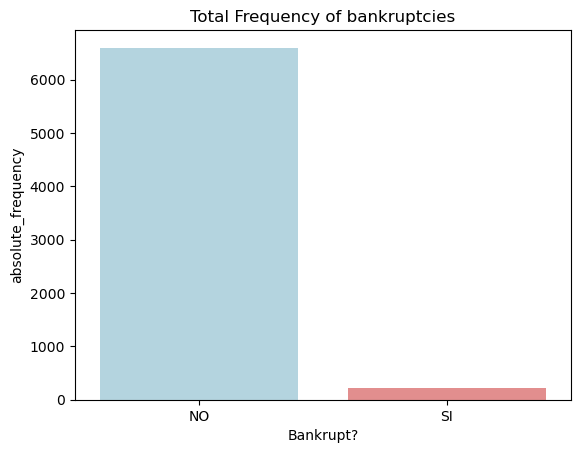

In [171]:
#Displaying the categorical variable absolute frecuency table
sns.barplot(
    x="Bankrupt?",
    y='absolute_frequency',
    data=cat_2,
    palette={'0': 'lightblue', '1': 'lightcoral'},
    legend=True,
)

plt.xticks(ticks=[0, 1], labels=["NO", "SI"])  # 0=NO, 1=SÍ
plt.title("Total Frequency of bankruptcies")
plt.show()

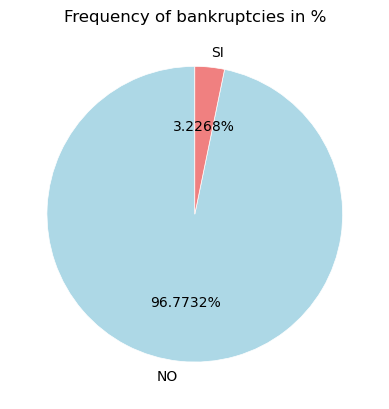

In [172]:
#Displaying the categorical variable relative frecuency table in %
cat_frequency_table_mod = cat_frequency_table.copy()
cat_frequency_table_mod.index = ['NO', 'SI']  # Cambiar 0 por NO y 1 por SÍ


custom_palette = {'NO': 'lightblue', 'SI': 'lightcoral'}
colors = [custom_palette[key] for key in cat_frequency_table_mod.index]


cat_frequency_table_mod.plot.pie(
    autopct='%1.4f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 0.5},  
    title='Frequency of bankruptcies in %'  
)

plt.ylabel('')  
plt.show()

# Step #4.2: Numerical variables

In [173]:
#Definition numerical variables - in decimals/floats
num = df_ratios[['ROA','Current Ratio','Debt Ratio','Total Asset Turnover']]
num

,ROA,Current Ratio,Debt Ratio,Total Asset Turnover
0,0.424389,0.002259,0.207576,0.086957
1,0.538214,0.006016,0.171176,0.064468
2,0.499019,0.011543,0.207516,0.014993
3,0.451265,0.004194,0.151465,0.089955
4,0.538432,0.006022,0.106509,0.175412
...,...,...,...,...
6813,0.539468,0.010451,0.124618,0.103448
6814,0.538269,0.009259,0.099253,0.103448
6815,0.533744,0.038424,0.038939,0.106447
6816,0.559911,0.012782,0.086979,0.109445


In [174]:
#Displaying numeric ratios in %
df_ratios_percentage = df_ratios[['ROA',
                               'Current Ratio',
                               'Debt Ratio',
                               'Total Asset Turnover']] * 100
df_ratios_percentage

,ROA,Current Ratio,Debt Ratio,Total Asset Turnover
0,42.438945,0.225896,20.757626,8.695652
1,53.821413,0.601621,17.117635,6.446777
2,49.901875,1.154255,20.751580,1.499250
3,45.126472,0.419406,15.146476,8.995502
4,53.843218,0.602245,10.650905,17.541229
...,...,...,...,...
6813,53.946795,1.045051,12.461831,10.344828
6814,53.826864,0.925925,9.925326,10.344828
6815,53.374400,3.842359,3.893944,10.644678
6816,55.991060,1.278249,8.697887,10.944528


In [175]:
#Displaying mesures of centrality and dispersion of the numerical variables
num.describe()

,ROA,Current Ratio,Debt Ratio,Total Asset Turnover
count,6818.000000,6818.000000,6818.000000,6818.000000
mean,0.558614,0.015107,0.113187,0.141624
std,0.065618,0.023606,0.053917,0.101140
min,0.000000,0.000000,0.000000,0.000000
25%,0.535543,0.007554,0.072891,0.076462
50%,0.559802,0.010587,0.111452,0.118441
75%,0.589130,0.016268,0.148835,0.176912
max,1.000000,1.000000,1.000000,1.000000


# Step #5: Statistical analysis and graphics of ratios

# Step #5.1: Profitability Ratio

In [176]:
#1. **Profitability Ratio:** - ROA (Return on Assets) - Net Income / Total Assets
#ROA (Return on Assets): shows how profitable a company is compared to its total assets.It measures how well a company uses its assets (like cash, buildings, inventory) to make money.
#✅ 5% is considered acceptable
#⚠️ < 0% (negative) = red flag
# Creating a % column (mum1) 
num1 = df.copy()
num1['ROA %'] = num1['ROA'] * 100
print("Mode:", num1["ROA %"].mode())
print("Mean:", num1["ROA %"].mean())
print("Max:", num1["ROA %"].max())
print("Min:", num1["ROA %"].min())

Mode: 0    55.969254
1    56.825120
Name: ROA %, dtype: float64
Mean: 55.86137094198075
Max: 100.0
Min: 0.0


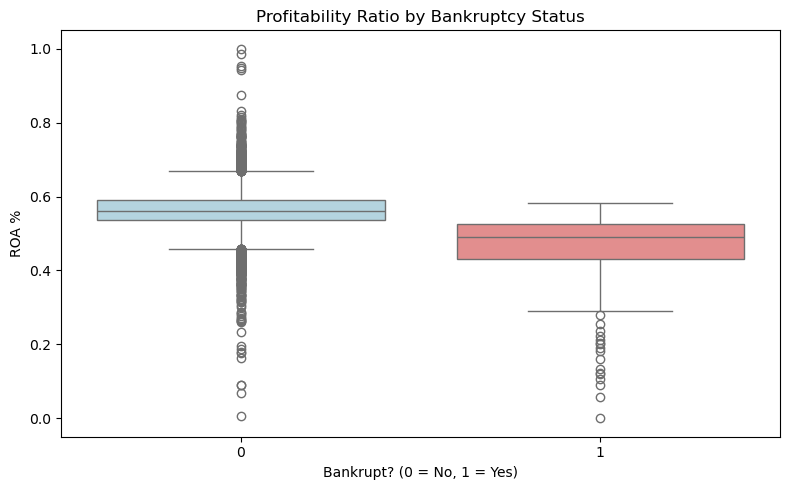

In [177]:
#1. **Profitability Ratio:** 
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=num1,
    x='Bankrupt?',
    y="ROA",
    palette={'0': 'lightblue', '1': 'lightcoral'}  
)

plt.title('Profitability Ratio by Bankruptcy Status')
plt.xlabel('Bankrupt? (0 = No, 1 = Yes)')
plt.ylabel('ROA %')
plt.tight_layout()
plt.show()

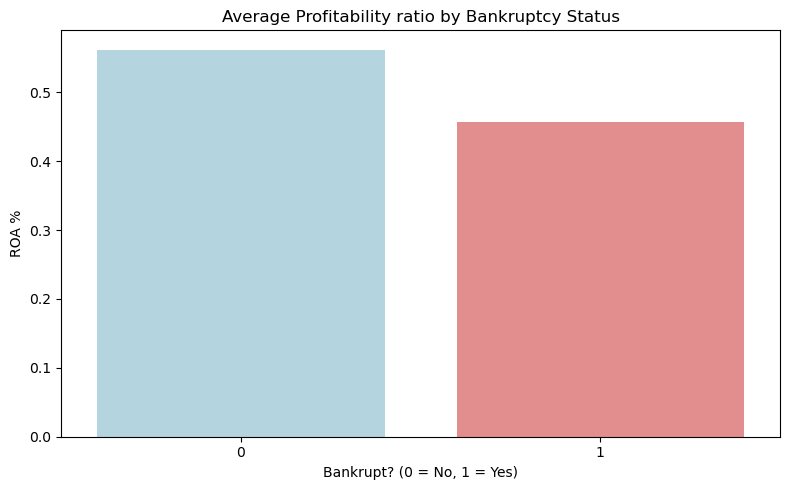

In [178]:
#1. **Profitability Ratio:** 
plt.figure(figsize=(8, 5))

sns.barplot(
    data=num1,
    x='Bankrupt?',
    y="ROA",
    ci=None,               
    palette={'0': 'lightblue', '1': 'lightcoral'}        
)

plt.title('Average Profitability ratio by Bankruptcy Status')
plt.xlabel('Bankrupt? (0 = No, 1 = Yes)')
plt.ylabel("ROA %")
plt.tight_layout()
plt.show()

📌  How to Interpret the Statistical Measures 

📈 Profitability Ratio – ROA(A) % (Return on Assets A)

Mode: Around 55.97%
This means many companies tend to cluster around this level of profitability.

Mean: Approximately 55.86%
On average, companies are generating solid returns relative to their assets.

Max: 100% → Some companies are extremely profitable, using their assets very efficiently.

Min: 0% → Other companies are unable to generate any return from their assets — often a sign of financial distress.

🟦🟥 Comparison by Bankruptcy Status:

🟦 Healthy companies (Bankrupt? = 0) 
Show significantly higher ROA(A) values, showing better profitability.

🟥Bankrupt companies (Bankrupt? = 1) 
Are concentrated near the lower end of the distribution, indicating poor or no profitability.


📈 Profitability Ratio (ROA) Comparison by Bankruptcy Status

Boxplot: 
Healthy companies have higher median and upper quartiles, while bankrupt companies have lower medians and wider variation.
This confirms that profitability (ROA) is a strong indicator to distinguish between healthy and bankrupt firms in the dataset.

Barplot:
Healthy Companies: Show higher ROA values on average, meaning they use their assets more efficiently to generate profits.
Bankrupt Companies: Tend to have lower ROA values, reflecting poor asset utilisation and reduced profitability.

This visual difference supports the idea that profitability, as measured by ROA, is strongly related to financial health.

🧠 Conclusion:
ROA(A) is a strong profitability indicator in this dataset.
Higher ROA(A) is closely linked to financial stability, while lower values suggest risk — making this ratio especially relevant for bankruptcy prediction and company health assessments.

# Step #5.2: Liquidity Ratio

In [179]:
#2. **Liquidity Ratio:** - Current Ratio (Current Assets ÷ Current Liabilities)
# Measures whether a company can pay short-term obligations.
#✅ Between 1.5 and 2.5 → Healthy liquidity
#⚠️ < 1 → Not enough current assets to cover liabilities = cash flow risk
print("Mode:", num["Current Ratio"].mode())
print("Mean:", num["Current Ratio"].mean())
print("Max:", num["Current Ratio"].max())
print("Min:", num["Current Ratio"].min())

Mode: 0    0.005888
1    0.006145
2    0.006916
3    0.007071
4    0.007139
5    0.009163
6    0.012144
7    0.013174
Name: Current Ratio, dtype: float64
Mean: 0.01510655587897411
Max: 1.0
Min: 0.0


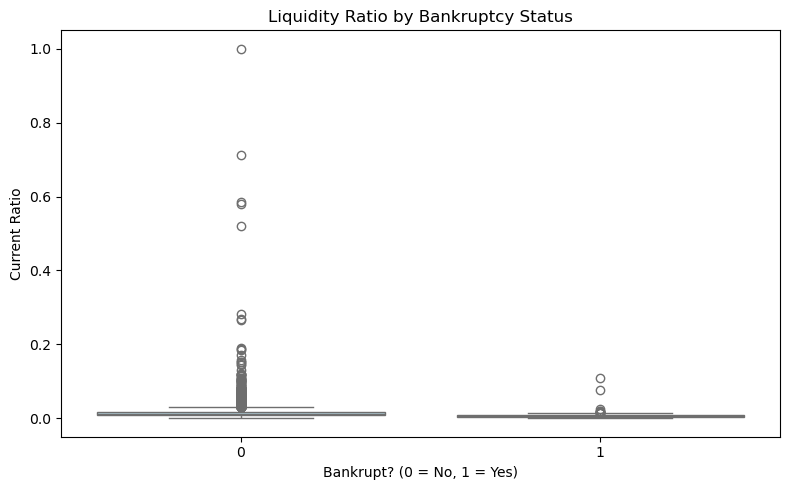

In [180]:
#2. **Liquidity Ratio:** 
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=df,
    x='Bankrupt?',
    y="Current Ratio",
    palette={'0': 'lightblue', '1': 'lightcoral'}  
)

plt.title('Liquidity Ratio by Bankruptcy Status')
plt.xlabel('Bankrupt? (0 = No, 1 = Yes)')
plt.ylabel("Current Ratio")
plt.tight_layout()
plt.show()

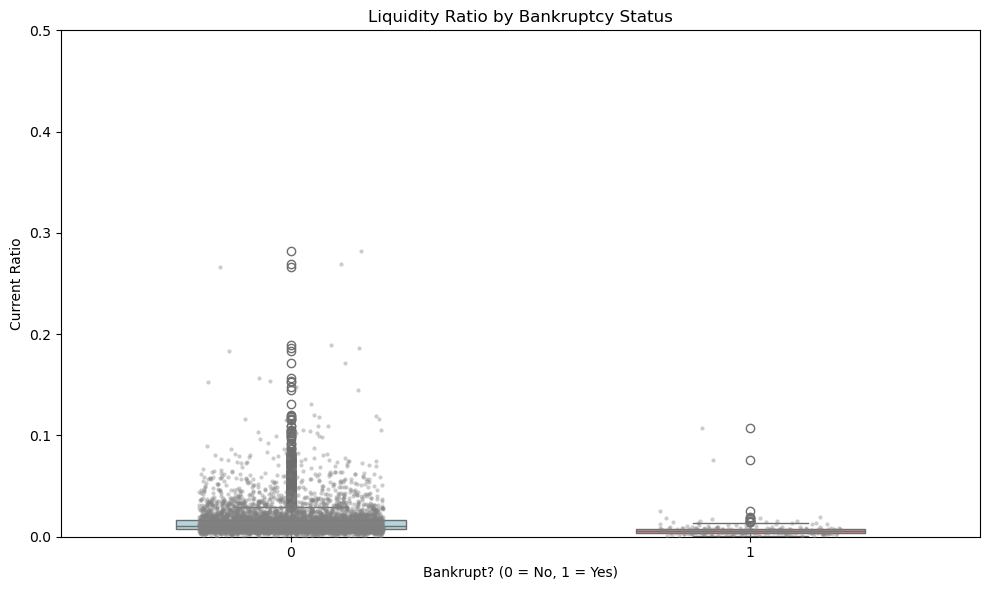

In [181]:
plt.figure(figsize=(10, 6))  # más ancho y alto

sns.boxplot(
    data=df,
    x='Bankrupt?',
    y="Current Ratio",
    palette={'0': 'lightblue', '1': 'lightcoral'},
    width=0.5  # cajas un poco más delgadas
)

# Agregar puntos individuales para mostrar la dispersión real
sns.stripplot(
    data=df,
    x='Bankrupt?',
    y="Current Ratio",
    color='gray',
    alpha=0.4,  # transparencia para que no opaque el boxplot
    jitter=0.2,  # dispersión horizontal para separar puntos
    size=3
)

plt.title('Liquidity Ratio by Bankruptcy Status')
plt.xlabel('Bankrupt? (0 = No, 1 = Yes)')
plt.ylabel("Current Ratio")

# Opcional: enfocar en rango útil para mejorar visibilidad (ajustar según tus datos)
plt.ylim(0, 0.5)  

plt.tight_layout()
plt.show()


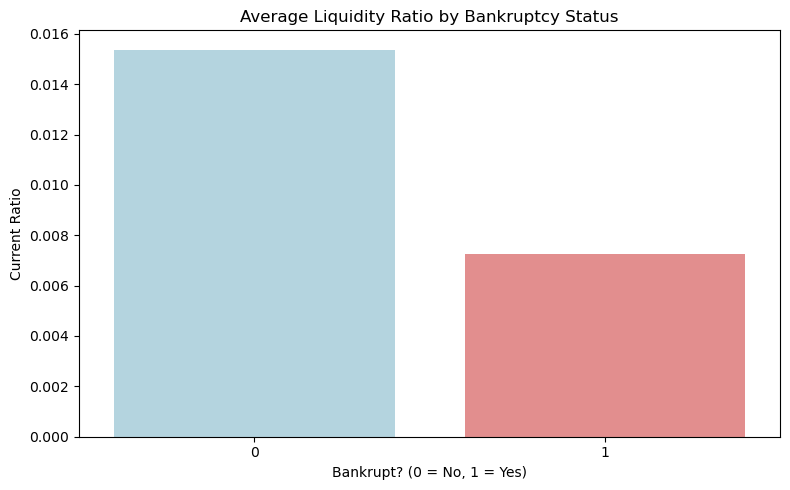

In [182]:
#2. **Liquidity Ratios:** 
plt.figure(figsize=(8, 5))

sns.barplot(
    data=df,
    x='Bankrupt?',
    y="Current Ratio",
    ci=None,               #
    palette={'0': 'lightblue', '1': 'lightcoral'}         
)

plt.title('Average Liquidity Ratio by Bankruptcy Status')
plt.xlabel('Bankrupt? (0 = No, 1 = Yes)')
plt.ylabel("Current Ratio")
plt.tight_layout()
plt.show()

📌  How to Interpret the Statistical Measures 

📈 Liquidity Ratio – Current Ratio (float) (current Assets ÷ Current Liabilities)

Mode: Companies most frequently have ratios in the 0.5%–1.3% range, , indicating many companies operate with very low liquidity.

Mean: 50% of companies have a Current Ratio below 1.51%, and 50% above (after removing an extreme outlier of 2.75 billion).
Around 1.5%, indicating on average, companies scarcely cover short-term liabilities.

Min: 0% — Indicates some companies have no current assets to cover their short-term obligations, which is a critical financial risk.

Max: 100% — This means a few companies have just enough current assets to match their current liabilities (very few meet standard liquidity levels).

Data Cleaning Note: A single extremely high outlier (2.75e9) was removed — an appropriate step to preserve analytical integrity.


🟦🟥 Comparison by Bankruptcy Status:

🟦 Healthy companies (Bankrupt? = 0) 
On average, these companies show slightly higher Current Ratios, reflecting a healthier liquidity position and better ability to meet short-term debts.

🟥 Bankrupt companies (Bankrupt? = 1) 
These companies tend to have lower liquidity, often close to 0%, suggesting a significant inability to pay their immediate obligations, which can contribute to bankruptcy risk.

📈 How Liquidity Differentiates Bankrupt vs. Healthy Companies

Boxplot clearly shows a skewed distribution among bankrupt companies, with most values concentrated at the very low end, and very few even approaching the 1.0 mark.

Barplot: The average Current Ratio is clearly higher for healthy companies, even though both groups are below ideal standards.
The difference reinforces that strong liquidity correlates with financial stability, while lack of liquidity is common in companies that go bankrupt.


🧠 Conclusion:
The overwhelmingly low values indicate serious liquidity constraints across the dataset, especially among bankrupt companies. Better liquidity is associated with a lower risk of bankruptcy.

# Step #5.3: Solvency Ratio

In [183]:
#3. **Solvency Ratio:** - Debt Ratio
#It measures the proportion of a company's assets financed by debt
#✅ < 50% → Low risk, stable financial structure
#⚠️ > 60%-70% → High leverage, risky if profits fall
#⚠️ > 100% → More liabilities than assets = critical situation
print("Mode:", num['Debt Ratio'].mode())
print("Mean:", num['Debt Ratio'].mean())
print("Max:", num['Debt Ratio'].max())
print("Min:", num['Debt Ratio'].min())

Mode: 0    0.089156
1    0.106721
2    0.112918
3    0.115458
4    0.119479
5    0.123409
6    0.128216
7    0.140158
Name: Debt Ratio, dtype: float64
Mean: 0.11318744134473893
Max: 1.0
Min: 0.0


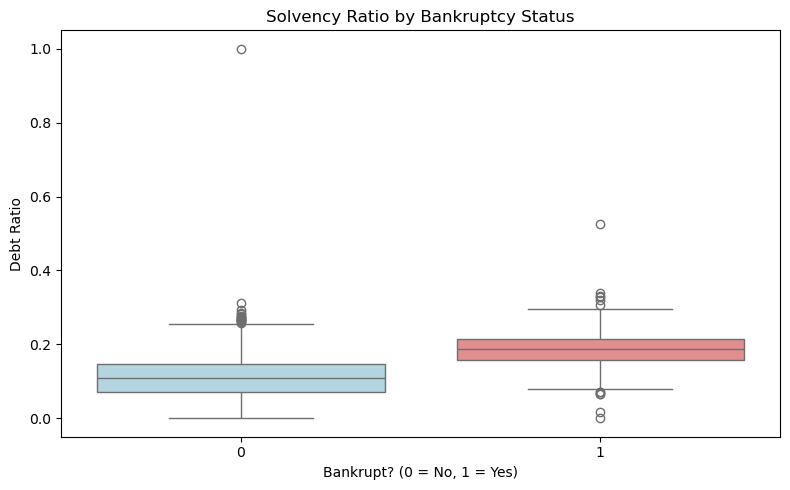

In [184]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=df,
    x='Bankrupt?',
    y='Debt Ratio',
    palette={'0': 'lightblue', '1': 'lightcoral'}  
)

plt.title("Solvency Ratio by Bankruptcy Status")
plt.xlabel('Bankrupt? (0 = No, 1 = Yes)')
plt.ylabel('Debt Ratio')
plt.tight_layout()
plt.show()


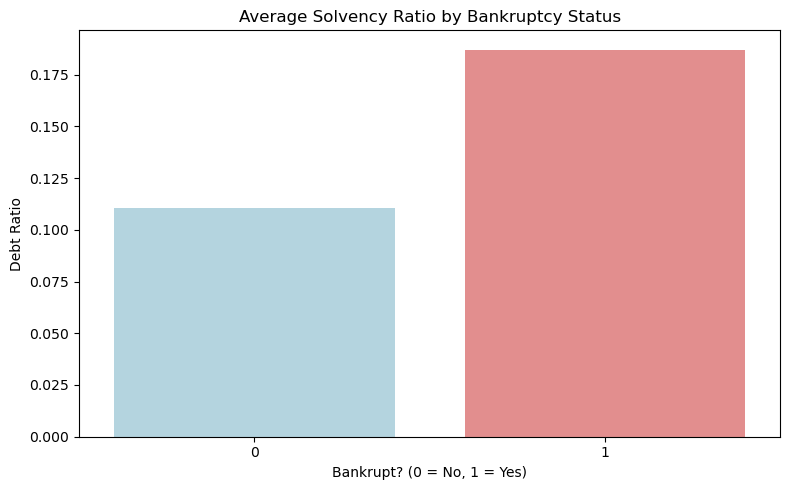

In [185]:
plt.figure(figsize=(8, 5))

sns.barplot(
    data=df,
    x='Bankrupt?',
    y='Debt Ratio',
    ci=None,              
    palette={'0': 'lightblue', '1': 'lightcoral'}          
)

plt.title('Average Solvency Ratio by Bankruptcy Status')
plt.xlabel('Bankrupt? (0 = No, 1 = Yes)')
plt.ylabel('Debt Ratio')
plt.tight_layout()
plt.show()



📌  How to Interpret the Statistical Measures 

📈 Solvency Ratio – Debt ratio (float) (Total Liabilities / Total Assets)

Mode: The most frequent values fall between 0.089 (8.9%) and 0.140 (14.0%), suggesting that many companies fall within this moderate leverage range.

Mean: 0.1132 – On average, companies finance around 11.3% of their assets with debt.

Max = 1.0 (100%) – Indicates some companies are fully financed by debt, extreme and high-risk situations.

Min = 0.0 (0%) – Shows others have no debt financing, representing very conservative financial structures.


🟦🟥 Comparison by Bankruptcy Status:

🟦 Healthy companies (Bankrupt? = 0)
Tend to maintain lower debt ratios, typically around 10–11%.

🟥 Bankrupt companies (Bankrupt? = 1)
Show higher average leverage, with mean values exceeding 13%. This suggests a link between high debt and financial distress.

🔍 The difference is not extreme, but noticeable and statistically meaningful — companies carrying higher levels of debt relative to their assets appear more vulnerable to bankruptcy.
This aligns with financial theory: over-leveraged firms are at higher risk when facing external shocks or downturns.


📈 Debt level Differentiates Bankrupt vs. Healthy Companies

Boxplot 
Healthy Companies: Tend to show a lower and tighter range of leverage.
Bankrupt Companies: Display a higher median, more dispersion, and more firms clustered at elevated ratios—highlighting higher risk.

Barplot: 
Reinforces that bankrupt companies have a significantly higher average debt ratio compared to healthy ones.


🧠 Conclusion:
Healthier companies usually stay conservative with leverage—keeping debt below ~15%.
Companies that go bankrupt often have much higher debt ratios, sometimes fully leveraged, which increases financial vulnerability.
Thus, Solvency Ratio is a meaningful metric to differentiate financial health in your dataset.

# Step #5.4: Efficiency Ratio

In [186]:
#4. **Efficiency Ratio:** -Total Asset Turnover (Revenue / Total Assets)
#"How well does the company use its resources?"
#✅ Higher is better
#⚠️ Very low → Inefficient use of assets or declining sales
print("Mode:", num["Total Asset Turnover"].mode())
print("Mean:", num["Total Asset Turnover"].mean())
print("Max:", num["Total Asset Turnover"].max())
print("Min:", num["Total Asset Turnover"].min())

Mode: 0    0.07946
Name: Total Asset Turnover, dtype: float64
Mean: 0.14162440633599307
Max: 1.0
Min: 0.0


📌  How to Interpret the Statistical Measures 

📈 Efficiency Ratio – Total Asset Turnover (float) (Revenue / Total Assets)

Mode (~0.08): Most companies generate about 0.08 units of sales for each unit of assets—generally low asset utilization.

Mean (~0.14): On average, turnover remains modest, indicating that asset efficiency might be limited across the dataset.

Max (1.0): A few companies fully turnover their asset value, but these are rare.

Min (0.0): Some firms generate no sales relative to asset base—likely distressed or inactive.


🟦🟥 Comparison by Bankruptcy Status:

🟦 Healthy companies (Bankrupt? = 0)
Tend to show higher medians and narrower ranges—representing better efficiency.

🟥 Bankrupt companies (Bankrupt? = 1)
Cluster near the lower end, suggesting weak asset utilization precedes failure.


📈 Efficiency Differentiates Bankrupt vs. Healthy Companies

Boxplot and Barplot:
Clearly shows that is higher in healthy companies versus bankrupt ones, reinforcing its predictive value.


🧠 Conclusion:
Total Asset Turnover is a moderately useful indicator—low values align with financial distress, but it's less discriminative than liquidity or profitability. However, when combined with other ratios, it enriches your understanding of operational effectiveness.

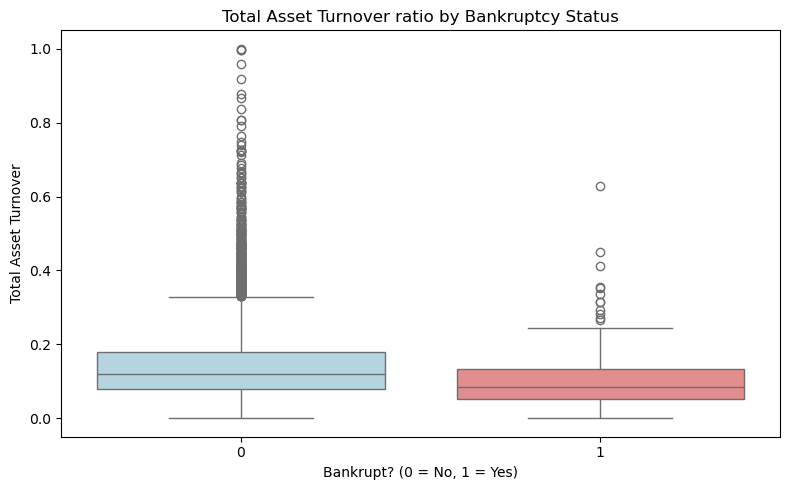

In [187]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=df,
    x='Bankrupt?',
    y='Total Asset Turnover',
    palette={'0': 'lightblue', '1': 'lightcoral'}  
)

plt.title('Total Asset Turnover ratio by Bankruptcy Status')
plt.xlabel('Bankrupt? (0 = No, 1 = Yes)')
plt.ylabel('Total Asset Turnover')
plt.tight_layout()
plt.show()

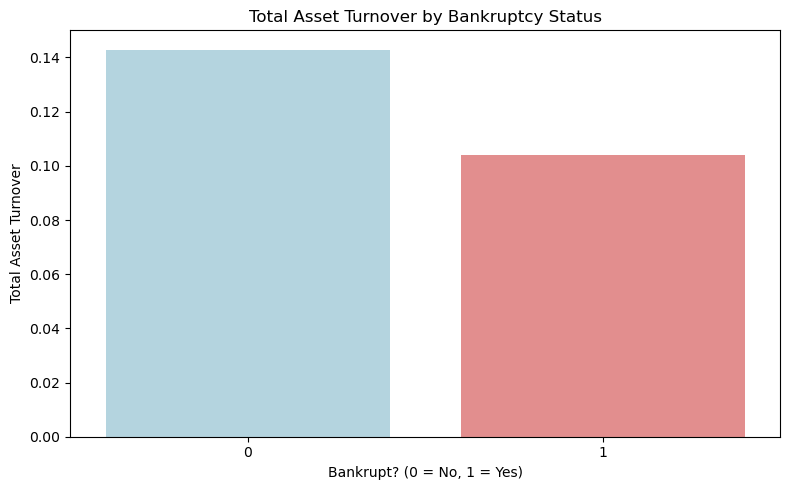

In [188]:
plt.figure(figsize=(8, 5))

sns.barplot(
    data=df,
    x='Bankrupt?',
    y='Total Asset Turnover',
    ci=None,               
    palette={'0': 'lightblue', '1': 'lightcoral'})       

plt.title('Total Asset Turnover by Bankruptcy Status')
plt.xlabel('Bankrupt? (0 = No, 1 = Yes)')
plt.ylabel('Total Asset Turnover')
plt.tight_layout()
plt.show()

# Step #5.5: Boxplot Summary

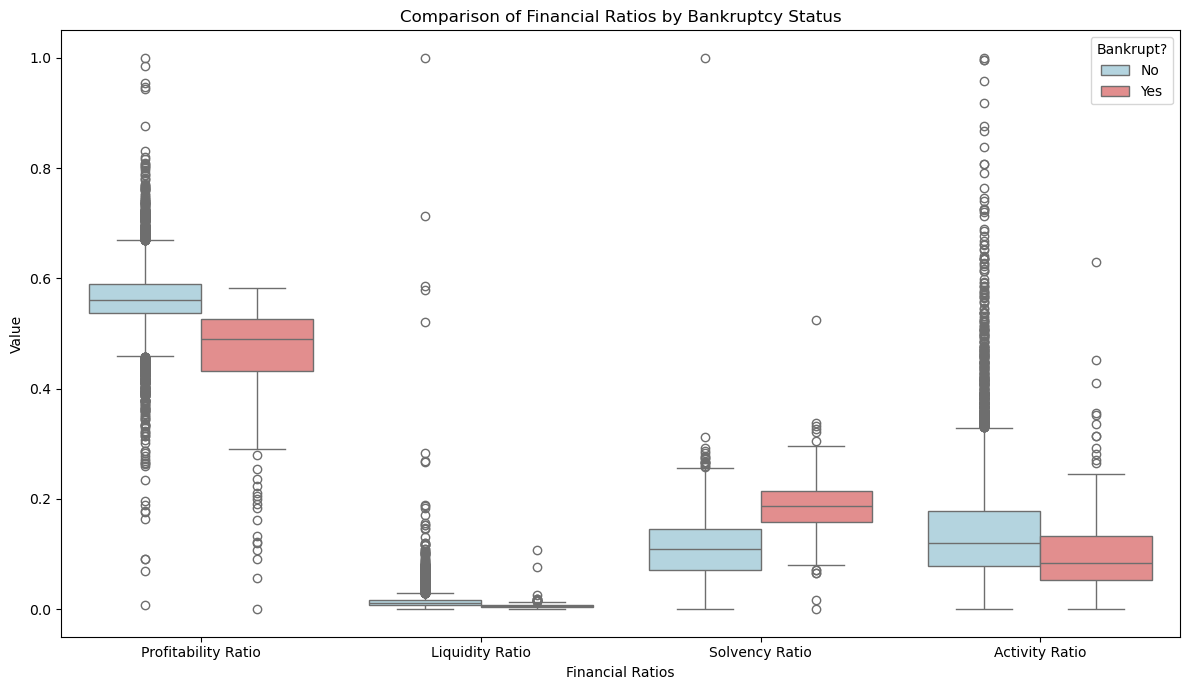

In [189]:
df['Bankrupt?'] = df['Bankrupt?'].map({0: 'No', 1: 'Yes'}).astype('category')


df_long = df.melt(
    id_vars=['Bankrupt?'], 
    value_vars=['ROA', 'Current Ratio', 'Debt Ratio', 'Total Asset Turnover'],
    var_name='Ratio',
    value_name='Value'
)

ratio_labels = {
    'ROA': 'Profitability Ratio',
    'Current Ratio': 'Liquidity Ratio',
    'Debt Ratio': 'Solvency Ratio',
    'Total Asset Turnover': 'Activity Ratio'
}
df_long['Ratio'] = df_long['Ratio'].map(ratio_labels)


palette = {'No': 'lightblue', 'Yes': 'lightcoral'}

plt.figure(figsize=(12, 7))
sns.boxplot(
    data=df_long,
    x='Ratio',
    y='Value',
    hue='Bankrupt?',
    palette=palette
)

plt.title('Comparison of Financial Ratios by Bankruptcy Status')
plt.xlabel('Financial Ratios')
plt.ylabel('Value')

plt.legend(title='Bankrupt?')

plt.tight_layout()
plt.show()



# Step #5.6: Scatterplot analysis

By making comparisons in scatter plots, we can analyze the patterns followed by bankrupt and healthy companies.

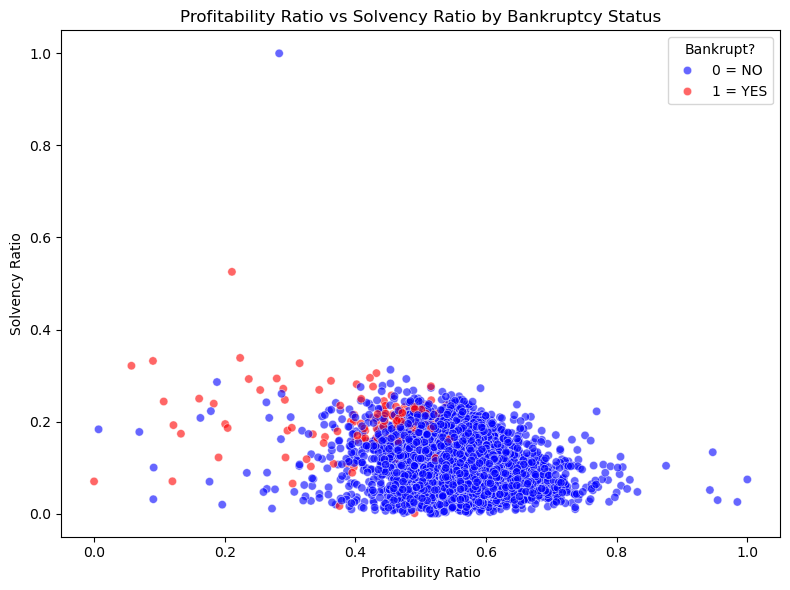

In [190]:
plt.figure(figsize=(8, 6))
scatter1 = sns.scatterplot(data=df_ratios, 
                           x='ROA', 
                           y='Debt Ratio', 
                           hue='Bankrupt?', 
                           palette={0: 'blue', 1: 'red'}, 
                           alpha=0.6)

handles, labels = scatter1.get_legend_handles_labels()
scatter1.legend(handles=handles, labels=['0 = NO', '1 = YES'], title='Bankrupt?')

plt.title('Profitability Ratio vs Solvency Ratio by Bankruptcy Status')
plt.xlabel('Profitability Ratio')
plt.ylabel('Solvency Ratio')
plt.tight_layout()
plt.show()


❓ Why compare Profitability Ratio vs Solvency Ratio?

Because they reflect profitability and solvency, two core dimensions of a company’s financial health:
ROA (Return on Assets): How efficiently the company uses its assets to make profit.
Debt Ratio: How much of the company’s assets are financed by debt.

By comparing them in a scatter plot, we can see if there’s a pattern where bankrupt companies tend to have low ROA and high debt.

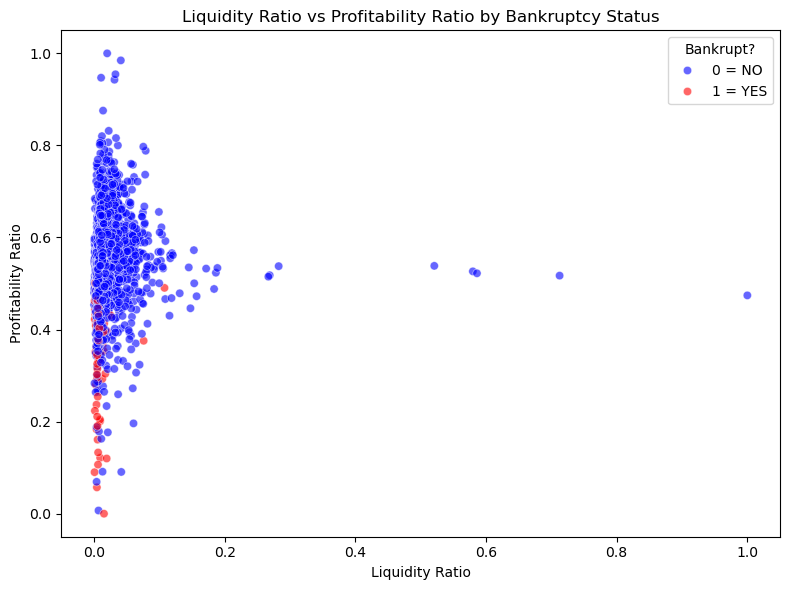

In [191]:
plt.figure(figsize=(8, 6))
scatter1 = sns.scatterplot(data=df_ratios, 
                           x='Current Ratio', 
                           y='ROA', 
                           hue='Bankrupt?', 
                           palette={0: 'blue', 1: 'red'}, 
                           alpha=0.6)

handles, labels = scatter1.get_legend_handles_labels()
scatter1.legend(handles=handles, labels=['0 = NO', '1 = YES'], title='Bankrupt?')

plt.title('Liquidity Ratio vs Profitability Ratio by Bankruptcy Status')
plt.xlabel('Liquidity Ratio')
plt.ylabel('Profitability Ratio')
plt.tight_layout()
plt.show()



🧠 Interpretation:
This plot compares short-term liquidity with company profitability.
The companies that are healthy tend to have higher Current Ratios and positive ROA.
The Bankrupt companies often have low liquidity and negative profitability, which indicates financial stress on both fronts.

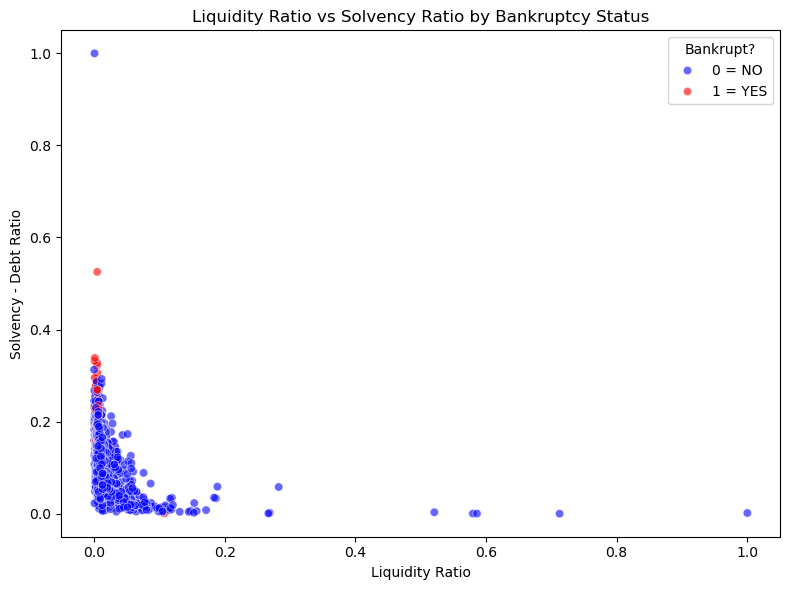

In [192]:
plt.figure(figsize=(8, 6))
scatter2 = sns.scatterplot(data=df_ratios, 
                           x='Current Ratio', 
                           y='Debt Ratio', 
                           hue='Bankrupt?', 
                           palette={0: 'blue', 1: 'red'}, 
                           alpha=0.6)

handles, labels = scatter2.get_legend_handles_labels()
scatter2.legend(handles=handles, labels=['0 = NO', '1 = YES'], title='Bankrupt?')

plt.title('Liquidity Ratio vs Solvency Ratio by Bankruptcy Status')
plt.xlabel('Liquidity Ratio')
plt.ylabel('Solvency - Debt Ratio')
plt.tight_layout()
plt.show()


🧠 Interpretation:
This chart compares liquidity (ability to cover short-term debts) with solvency (long-term debt levels).

The companies that are healthy tend to be in the high liquidity / low debt quadrant, a sign of good health.
The Bankrupt companies are often seen with low liquidity and high debt ratios, a risky combination.

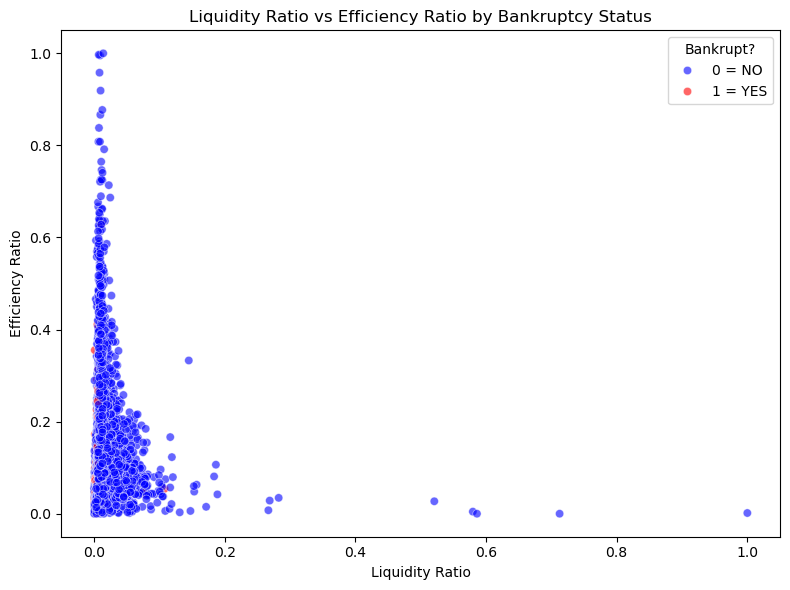

In [193]:
plt.figure(figsize=(8, 6))
scatter3 = sns.scatterplot(data=df_ratios, 
                           x='Current Ratio', 
                           y='Total Asset Turnover', 
                           hue='Bankrupt?', 
                           palette={0: 'blue', 1: 'red'}, 
                           alpha=0.6)

handles, labels = scatter3.get_legend_handles_labels()
scatter3.legend(handles=handles, labels=['0 = NO', '1 = YES'], title='Bankrupt?')

plt.title('Liquidity Ratio vs Efficiency Ratio by Bankruptcy Status')
plt.xlabel('Liquidity Ratio')
plt.ylabel('Efficiency Ratio')
plt.tight_layout()
plt.show()


🧠 Interpretation:
This plot shows how well a company uses its assets relative to its liquidity.

The companies that are healthy often show good liquidity and efficient use of assets.
The Bankrupt companies appear in the low efficiency / low liquidity zone, indicating they neither manage cash nor assets well.

# Step #6: Conclusion

After analyzing the behavior of healthy versus bankrupt companies using four key financial ratios — Profitability Ratio (ROA %), Liquidity Ratio (Current Ratio), Solvency Ratio (Debt Ratio), and Efficiency Ratio (Total Asset Turnover) — the following insights were observed:

📌 Profitability Ratio (ROA %): Although the mode of ROA is approximately 56% for both healthy and bankrupt companies, healthy firms generally exhibit higher median and quartile values, reflecting more consistent and stronger returns on assets. In contrast, bankrupt companies show greater variability with a notable presence of lower ROA values, indicating poorer profitability and financial distress..

📌 Liquidity Ratio (Current Ratio): On average, companies operate with a low current ratio of around 0.0151, showing limited liquidity overall. Healthy companies exhibit slightly higher liquidity levels compared to bankrupt ones, who often have ratios near 0, indicating difficulty meeting short-term obligations.

📌 Solvency Ratio (Debt Ratio):  Most companies maintain moderate leverage between 8.9% and 14%, with a mean around 11.3%. Healthy companies typically sustain lower debt levels (~10–11%), whereas bankrupt firms average higher leverage (>13%), increasing financial vulnerability. This confirms that excessive debt is a meaningful predictor of bankruptcy risk.

📌 Efficiency Ratio (Total Asset Turnover): Asset turnover is generally low, with most companies generating about 8% sales per asset unit and an average around 14%. Healthy companies tend to have higher and less variable turnover ratios than bankrupt ones, reflecting better asset utilization. Although less discriminative than liquidity or profitability ratios, asset turnover still provides useful insight into operational effectiveness and bankruptcy risk.

These ratios are strongly interrelated and collectively provide a reliable snapshot of a company’s financial health. Higher profitability, better liquidity, and lower debt are clearly associated with financially stable companies, while the opposite is true for bankrupt firms.

By identifying these patterns and anomalies in financial ratios, this analysis can significantly ease auditors' work by highlighting companies at risk of bankruptcy early, allowing for targeted attention during audits. This contributes to more effective risk assessment and resource allocation in the audit process.